In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import math
from scipy.optimize import minimize
import seaborn as sns
import time
import random

In [2]:
df = pd.read_excel("C:/Users/HP/Desktop/Desk/jupyter/database/pole.xls",header=None)
valor1 = df[2].tolist()
valor2 = df[3].tolist()
x = df[0].tolist()
y = df[1].tolist()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
df

,0,1,2,3
0,-11,-5.4,0.179050,12.253980
1,-10,-5.4,0.227646,11.364860
2,-9,-5.4,0.281210,10.495710
3,-8,-5.4,0.340821,9.651943
4,-7,-5.4,0.412311,8.840814
...,...,...,...,...
155,4,1.6,1.290713,4.308132
156,5,1.6,0.898272,5.249762
157,6,1.6,0.622030,6.209670
158,7,1.6,0.482289,7.180529


In [4]:
def distancia( x1, y1, x2, y2 ):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

In [5]:
def list_selec( valor, puntos ):
    X = []
    
    for i in puntos:
        X.append(valor[i])

    return X  

In [6]:
def distancias_al_punto( x , y, j ):
    d = []
    N = len(x)
    
    for i in range (0,N):
            d.append( [distancia( x[j], y[j], x[i], y[i] ), i] )
        
    return d

In [7]:
def graficar_circunferencia( x1, y1, h, k, radio):
    # Crear un conjunto de ángulos (en radianes) desde 0 hasta 2*pi
    theta = np.linspace(0, 2*np.pi, 100)

    # Calcular las coordenadas (x, y) de la circunferencia
    x = radio * np.cos(theta)+h
    y = radio * np.sin(theta)+k

    # Crear el gráfico de la circunferencia
    
    plt.figure(figsize=(9,9))
    plt.xlim(min(x), max(x))
    plt.ylim(min(y), max(y))
    plt.plot(x1,y1,"o",color="red")
    plt.plot(x, y, label='Circunferencia')
    # Especificar los límites en los ejes x e y
    plt.axis('scaled')
    
    # Mostrar el gráfico
    plt.show()

In [8]:
def dentro_fuera( punto, r, X, Y ):
    dentro = []; fuera = []
    N = len(X)
    Distancia = distancias_al_punto( X, Y, punto )
    
    for i in range(0,N):
        if( Distancia[i][0] <= r ):
            dentro.append( Distancia[i][1] )
        else:
            fuera.append( Distancia[i][1] )
            
    return [dentro,fuera]

In [9]:
def L_Z( punto, r, x, y, valor):
    dentroFuera = dentro_fuera(punto, r, x, y)
    fuera = dentroFuera[1]
    dentro = dentroFuera[0]
    N = len(valor)
    v_fuera = len(list_selec(valor, fuera) ) * np.var( list_selec(valor, fuera) )
    v_dentro = len( list_selec(valor, dentro) ) * np.var( list_selec(valor, dentro) )
    sigma_z = ( v_fuera + v_dentro) / N
    
    return -N/2 *math.log(2*math.pi ) -N/2 * math.log(sigma_z)-N/2

In [10]:
def max_L_Z( x, y, valor, circulos ):
    N = len(valor) ; L = []
        
    L0 = -N * math.log(math.sqrt(2* math.pi)) - N*math.log(np.std(valor))- N/2
    
    for i in range (0, len(circulos)):
        Lamda =  L_Z( circulos[i][0], circulos[i][1], x, y, valor ) - L0
        L.append( [ Lamda, circulos[i][0], circulos[i][1] ] )
        
    m = sorted(L)
    return m[len(m)-1]

In [11]:
def Circulos( limite_inf, limite_sup, x, y ):
    x_sin_repetidos = []; circulos=[]
    n= len(x)
    
    for i in range (0, n):
        d = distancias_al_punto( x, y, i )
        d = sorted(d) 
        for j in range(0, n):
            if (round(d[j][0] > 0)):
                q= len(dentro_fuera( i, d[j][0], x, y )[0])/n
                if( q <= limite_sup and limite_inf<= q):
                    circulos.append( [i, round(d[j][0], 3)] )
    
    for elemento in circulos:
        if elemento not in x_sin_repetidos:
            x_sin_repetidos.append(elemento)

    return x_sin_repetidos

In [27]:
def significancia(numero_de_simulaciones, valor2,x,y,circulos,Estimaciones):
    estadistico=[]
    
    for i in range(0, numero_de_simulaciones):
        conjunto_de_datos = np.random.normal(loc=np.mean(valor2), scale= np.std(valor2), size=len(valor2))
        random.shuffle(conjunto_de_datos)
        Estimacion_simulacion = max_L_Z(x,y,conjunto_de_datos,circulos)
        estadistico.append(Estimacion_simulacion[0])

    sns.histplot(estadistico, bins=13, kde=True)
    plt.title('Distribucion del estadistico')
    plt.xlabel('intensidad')
    plt.ylabel('Frequency')
    plt.show()
    estadistico = sorted(estadistico)  
    estadistico.append(Estimaciones[0])
    estadistico = sorted(estadistico,  reverse=True)
    
    for i in range ( 0, len(estadistico) ):
        if (estadistico[i] == Estimaciones[0]):
            c = i
            
    sigficancia =  (c + 1)/(numero_de_simulaciones + 1) 
    
    print("la significancia es", sigficancia)

    

In [12]:
# Inicio del contador de tiempo
start_time = time.time()

# código que quieres medir
circulos = Circulos( 0.15, 0.25, x, y)
Estimaciones = max_L_Z( x, y, valor2, circulos )

# Fin del contador de tiempo
end_time = time.time()

# Tiempo transcurrido
execution_time = end_time - start_time
print("Tiempo de ejecución: ", execution_time, "segundos")

centro = Estimaciones[1]
radio = Estimaciones[2]

dentroFuera = dentro_fuera(centro, radio, x, y)
fuera = dentroFuera[1]
dentro = dentroFuera[0]

print("Centro ", centro)
print("Radio ", radio)
print("media fuera ", np.mean(list_selec(valor2, fuera)))
print("media dentro ",np.mean(list_selec(valor2, dentro)))
print("Desviacion estandar global " ,np.std(valor2))

Tiempo de ejecución:  2.167534112930298 segundos
Centro  111
Radio  3.606
media fuera  7.233508408333334
media dentro  2.48659325
Desviacion estandar global  2.7922129968920837


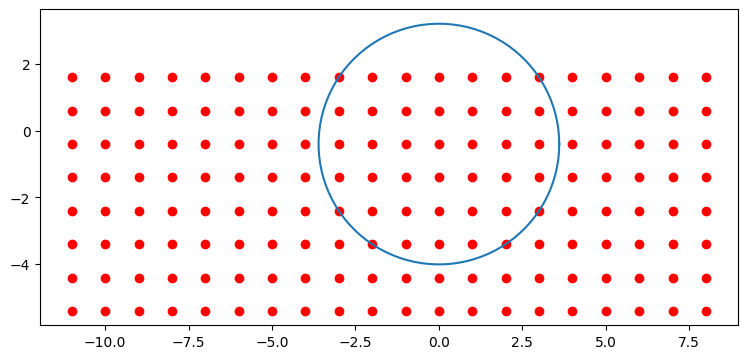

In [13]:
graficar_circunferencia( x, y , x[111], y[111], 3.606)

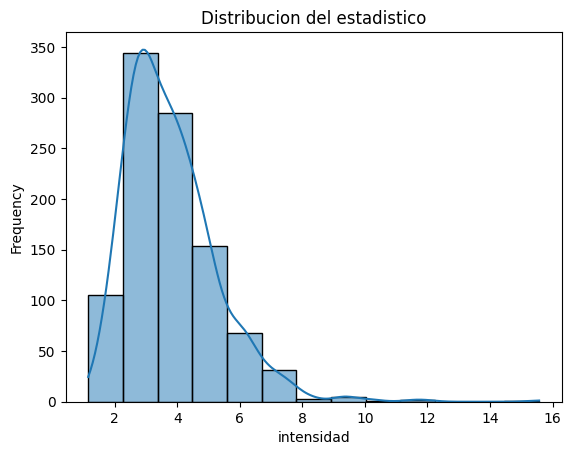

la significancia es 0.001


In [28]:
significancia(999, valor2,x,y,circulos)

## A partir de los resultados obtenidos, podemos concluir que existe una fuente puntual, y el punto 111 es identificado como dicha fuente.